In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
comp_opt = pd.read_csv('../results-data/res3_cell-compositions/si_2017_modulations.csv')
comp_opt.head()

,si_jun_excel_raw_number,growth_rate_per_hr,estim_SA_over_V,estim_aspect_ratio,estim_vol_um3,estim_C_plus_D_hrs,nutrient_type,cm_type,useless_type,model_k,...,model_fR,model_fQ,model_a,model_e,model_r,model_ra,model_q,model_u,model_ra_over_r,model_growth_rate
0,202,1.71,4.306,4.0089,3.40,1.37,7,0,0,9.964003,...,0.317292,0.495582,0.082876,0.171618,0.290996,0.290996,0.45451,0,1.000000,1.709999
1,203,1.63,4.473,3.9774,3.00,1.35,7,1,0,9.964003,...,0.327958,0.494178,0.080270,0.163586,0.301633,0.279921,0.45451,0,0.928020,1.629974
2,204,0.98,4.870,4.1282,2.39,1.88,7,1,0,9.964003,...,0.412727,0.482797,0.058589,0.098355,0.388545,0.184983,0.45451,0,0.476091,0.980009
3,205,0.96,5.107,4.0063,2.02,2.05,7,1,0,9.964003,...,0.415293,0.482437,0.057887,0.096350,0.391253,0.181907,0.45451,0,0.464936,0.960031
4,206,0.78,5.111,3.6121,1.89,2.48,7,1,0,9.964003,...,0.438352,0.479127,0.051378,0.078282,0.415830,0.153658,0.45451,0,0.369521,0.780002


In [8]:
comp_opt['SA_over_V_log'] = np.log(comp_opt['estim_SA_over_V'])

In [10]:
col_names = comp_opt.columns
col_names_to_remove = [cn for cn in col_names if 'growth_rate' in cn or 'model_' not in cn or 'fU' in cn or 'model_u' in cn]
predictors = comp_opt.copy().drop(columns=col_names_to_remove)
for c in predictors:
    predictors[c+'_log'] = np.log(predictors[c])
predictors.head()

C:\Users\inbio\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


,model_k,model_ri,model_fE,model_fR,model_fQ,model_a,model_e,model_r,model_ra,model_q,...,model_ri_log,model_fE_log,model_fR_log,model_fQ_log,model_a_log,model_e_log,model_r_log,model_ra_log,model_q_log,model_ra_over_r_log
0,9.964003,0.000000,0.187126,0.317292,0.495582,0.082876,0.171618,0.290996,0.290996,0.45451,...,-inf,-1.675974,-1.147933,-0.702022,-2.490411,-1.762486,-1.234446,-1.234446,-0.788535,0.000000
1,9.964003,0.021712,0.177863,0.327958,0.494178,0.080270,0.163586,0.301633,0.279921,0.45451,...,-3.829905,-1.726739,-1.114869,-0.704859,-2.522355,-1.810415,-1.198544,-1.273247,-0.788535,-0.074703
2,9.964003,0.203562,0.104476,0.412727,0.482797,0.058589,0.098355,0.388545,0.184983,0.45451,...,-1.591783,-2.258797,-0.884970,-0.728159,-2.837202,-2.319173,-0.945345,-1.687491,-0.788535,-0.742146
3,9.964003,0.209345,0.102270,0.415293,0.482437,0.057887,0.096350,0.391253,0.181907,0.45451,...,-1.563770,-2.280138,-0.878772,-0.728905,-2.849263,-2.339768,-0.938402,-1.704258,-0.788535,-0.765856
4,9.964003,0.262172,0.082522,0.438352,0.479127,0.051378,0.078282,0.415830,0.153658,0.45451,...,-1.338754,-2.494693,-0.824734,-0.735790,-2.968553,-2.547438,-0.877479,-1.873026,-0.788535,-0.995548


In [11]:
mlr = LinearRegression()
X = predictors[['model_k_log', 'model_ra_over_r_log']]
y = comp_opt['SA_over_V_log']
mlr.fit(X, y)
mlr.score(X, y)

0.8357144893677887

0.880698584229844
[-0.33194764  0.12466551]


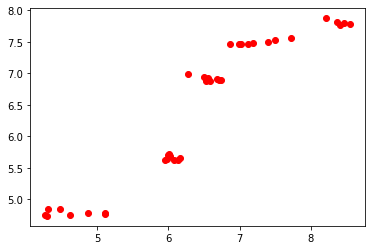

In [13]:
mlr = LinearRegression()
X = predictors[['model_k', 'model_ra_over_r']]
y = comp_opt['estim_SA_over_V']
mlr.fit(X, y)
print(mlr.score(X, y))
print(mlr.coef_)
plt.plot(y, mlr.predict(X), 'ro')

0.8798098720980887
[-0.33130571]
8.08149947078651


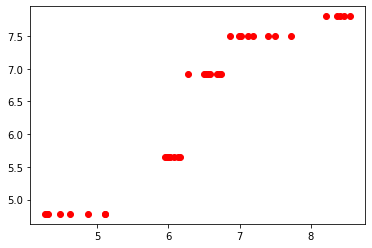

In [14]:
mlr = LinearRegression()
X = predictors[['model_k']]
y = comp_opt['estim_SA_over_V']
mlr.fit(X, y)
print(mlr.score(X, y))
print(mlr.coef_)
print(mlr.intercept_)
plt.plot(y, mlr.predict(X), 'ro')

In [16]:
y = comp_opt['SA_over_V_log']
fits_single = {}
scores_single = {}
for c1 in [c for c in predictors if 'log' in c and 'ri' not in c]:
    mlr = LinearRegression()
    X = predictors[[c1]]
    mlr.fit(X, y)
    scores_single[c1] = mlr.score(X, y)
    fits_single[c1] = mlr
print(scores_single)

{'model_k_log': 0.8328723629376333, 'model_fE_log': 0.49107866982229686, 'model_fR_log': 0.39589839803440324, 'model_fQ_log': 0.2527266352709192, 'model_a_log': 0.2320272312741526, 'model_e_log': 0.5114426106287177, 'model_r_log': 0.36964442360668254, 'model_ra_log': 0.22786628250787608, 'model_q_log': 3.3306690738754696e-16, 'model_ra_over_r_log': 0.0004346769506002879}


In [17]:
y = comp_opt['estim_SA_over_V']
fits_single = {}
scores_single = {}
for c1 in [c for c in predictors if 'log' not in c]:
    mlr = LinearRegression()
    X = predictors[[c1]]
    mlr.fit(X, y)
    scores_single[c1] = mlr.score(X, y)
    fits_single[c1] = mlr
print(scores_single)

{'model_k': 0.8798098720980887, 'model_ri': 0.07250093271476843, 'model_fE': 0.5317819166581329, 'model_fR': 0.47391088997781283, 'model_fQ': 0.2723729948089082, 'model_a': 0.27195228796165627, 'model_e': 0.5549925893733596, 'model_r': 0.43596750009733276, 'model_ra': 0.2718078915313523, 'model_q': 0.0, 'model_ra_over_r': 0.0007464571897277671}


In [19]:
y = comp_opt['SA_over_V_log']
scores_pairs = {}
for c1 in [c for c in predictors if 'log' in c and 'ri' not in c]:
    for c2 in [c for c in predictors if 'log' in c and 'ri' not in c]:
        if c1 != c2:
            mlr = LinearRegression()
            X = predictors[[c1, c2]]
            mlr.fit(X, y)
            scores_pairs[c1 + '_and_' + c2] = mlr.score(X, y)

for model,R2 in scores_pairs.items():
    print(model + ' -> ' + str(R2))

model_k_log_and_model_fE_log -> 0.8404579411138308
model_k_log_and_model_fR_log -> 0.8328725499141593
model_k_log_and_model_fQ_log -> 0.8343414461763932
model_k_log_and_model_a_log -> 0.8393539877834771
model_k_log_and_model_e_log -> 0.8406818923973234
model_k_log_and_model_r_log -> 0.8328769487406609
model_k_log_and_model_ra_log -> 0.8403562309691572
model_k_log_and_model_q_log -> 0.8328723629376333
model_k_log_and_model_ra_over_r_log -> 0.8357144893677887
model_fE_log_and_model_k_log -> 0.8404579411138308
model_fE_log_and_model_fR_log -> 0.4951209372745864
model_fE_log_and_model_fQ_log -> 0.8705717795710235
model_fE_log_and_model_a_log -> 0.8464616929056243
model_fE_log_and_model_e_log -> 0.8705717795710212
model_fE_log_and_model_r_log -> 0.49133291474853935
model_fE_log_and_model_ra_log -> 0.8410047391214203
model_fE_log_and_model_q_log -> 0.49107866982229686
model_fE_log_and_model_ra_over_r_log -> 0.8215732948441967
model_fR_log_and_model_k_log -> 0.8328725499141593
model_fR_log_an

In [20]:
y = comp_opt['estim_SA_over_V']
scores_pairs = {}
for c1 in [c for c in predictors if 'log' not in c]:
    for c2 in [c for c in predictors if 'log' not in c]:
        if c1 != c2:
            mlr = LinearRegression()
            X = predictors[[c1, c2]]
            mlr.fit(X, y)
            scores_pairs[c1 + '_and_' + c2] = mlr.score(X, y)
for model,R2 in scores_pairs.items():
    print(model + ' -> ' + str(R2))

model_k_and_model_ri -> 0.8840648330875563
model_k_and_model_fE -> 0.8914652242177628
model_k_and_model_fR -> 0.8902190124038811
model_k_and_model_fQ -> 0.8798098734182601
model_k_and_model_a -> 0.8798105087669775
model_k_and_model_e -> 0.8925615906075042
model_k_and_model_r -> 0.8899541846803796
model_k_and_model_ra -> 0.8798099677826089
model_k_and_model_q -> 0.8798098720980886
model_k_and_model_ra_over_r -> 0.880698584229844
model_ri_and_model_k -> 0.8840648330875565
model_ri_and_model_fE -> 0.806994518430863
model_ri_and_model_fR -> 0.806497029642562
model_ri_and_model_fQ -> 0.8108803710504001
model_ri_and_model_a -> 0.8091065584519839
model_ri_and_model_e -> 0.8097465126294896
model_ri_and_model_r -> 0.8094879520013342
model_ri_and_model_ra -> 0.809487952001334
model_ri_and_model_q -> 0.07250093271476843
model_ri_and_model_ra_over_r -> 0.5577697051192776
model_fE_and_model_k -> 0.8914652242177628
model_fE_and_model_ri -> 0.806994518430863
model_fE_and_model_fR -> 0.809044435453638

0.8925615906075042
[-0.29116199  1.87090991]
7.547882481327979


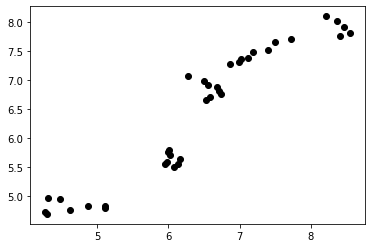

In [21]:
y = comp_opt['estim_SA_over_V']
X = comp_opt[['model_k', 'model_e']]
mlr = LinearRegression()
mlr.fit(X, y)
print(mlr.score(X, y))
print(mlr.coef_)
print(mlr.intercept_)
plt.plot(y, mlr.predict(X), 'ko')

0.9127486470771498
[-2.60544927]
9.244550706093237


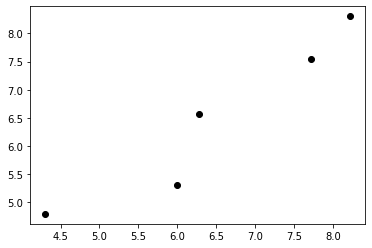

In [24]:
y = comp_opt.query('cm_type == 0')['estim_SA_over_V']
X = comp_opt.query('cm_type == 0')[['model_growth_rate']]
mlr = LinearRegression()
mlr.fit(X, y)
print(mlr.score(X, y))
print(mlr.coef_)
print(mlr.intercept_)
plt.plot(y, mlr.predict(X), 'ko')

0.8660941877150501
[-1.01749552  0.66489151]
-0.3606416044328915


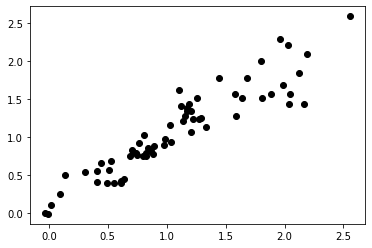

In [31]:
comp_opt_all = pd.read_csv('../results-data/res3_cell-compositions/basan_2015_si_2017_taheri_2015_modulations.csv')
y = np.log(comp_opt_all['cell_size'])
X = np.log(comp_opt_all[['model_e', 'model_ra_over_r']])
mlr = LinearRegression()
mlr.fit(X, y)
print(mlr.score(X, y))
print(mlr.coef_)
print(mlr.intercept_)
plt.plot(y, mlr.predict(X), 'ko')